# D-dimensional self-avoiding random walk

In [1]:
using Random
using PyPlot
include("PlotSingleWalk.jl");

In [2]:
function available_moves(dim::Int64)
    moves = [zeros(Float64,dim) for i ∈ 1:2*dim]
    odds = filter(i->(isodd(i)), 1:2*dim)
    for j in 1:dim
        i = odds[j]
        moves[i][j] = 1.0
        moves[i+1][j] = -1.0
    end
    return moves
end;

In [3]:
available_moves(5)

10-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0, 0.0, 0.0]
 [-1.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 1.0, 0.0, 0.0, 0.0]
 [0.0, -1.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 1.0, 0.0, 0.0]
 [0.0, 0.0, -1.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 1.0, 0.0]
 [0.0, 0.0, 0.0, -1.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 1.0]
 [0.0, 0.0, 0.0, 0.0, -1.0]

## Ignorant SARW

In [4]:
function ignorant_one_step(ndim::Int64=2)
    rn::Int64 = ceil(2*ndim*rand())
    x = zeros(Float64, ndim)
    for i ∈ 1:ndim
        j::Int64 = 2*i
        if rn == j-1
            x[i] = 1.0
        elseif rn == j
            x[i] = -1.0
        end
    end
    return x
end;

In [5]:
for d ∈ 1:5
    x = ignorant_one_step(d)
    println("$(d)d $x")
end

1d [-1.0]
2d [0.0, -1.0]
3d [-1.0, 0.0, 0.0]
4d [0.0, 1.0, 0.0, 0.0]
5d [0.0, 1.0, 0.0, 0.0, 0.0]


In [65]:
function single_ignorant_SARW(nsteps::Int64=10; ndim::Int64=2)
    """ Generate a single ignorant self-avoiding random walk in d-dimensions
    nsteps = number of steps of the random walk
    ndim = number of dimensions
    """
    traj = [zeros(Float64, ndim)]
    x = zeros(Float64, ndim)
    lattice = Dict([nsteps+1,nsteps+1]=>true)
    step = 1
    moves = available_moves(ndim)
    while true
        Δ = ignorant_one_step(ndim)
        lid = fill(Float64(nsteps)+1.0, ndim)
        lid_new = fill(Float64(nsteps)+1.0, ndim)
        for d ∈ 1:ndim
            lid[d] += x[d]
            lid_new[d] += Δ[d] + x[d]
        end
        trapped = [false for i in 1:2*ndim]
        for d ∈ 1:ndim
            j::Int64 = 2*d
            trapped[j-1] = haskey(lattice, lid.+moves[j-1])
            trapped[j] = haskey(lattice, lid.+moves[j])
        end
        if step == nsteps
            break
        elseif all(trapped)
            break
        elseif !haskey(lattice, lid_new)
            lattice[lid_new] = true
            x += Δ
            step += 1
            push!(traj, x)
        end
    end
    println("Terminated at step = $step")
    return traj
end;

In [66]:
single_ignorant_SARW(10,ndim=5)

Terminated at step = 10


10-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 1.0, 0.0, 0.0]
 [0.0, 0.0, 1.0, 0.0, -1.0]
 [1.0, 0.0, 1.0, 0.0, -1.0]
 [1.0, 0.0, 1.0, 1.0, -1.0]
 [0.0, 0.0, 1.0, 1.0, -1.0]
 [0.0, 0.0, 1.0, 1.0, 0.0]
 [0.0, 0.0, 0.0, 1.0, 0.0]
 [0.0, -1.0, 0.0, 1.0, 0.0]
 [1.0, -1.0, 0.0, 1.0, 0.0]

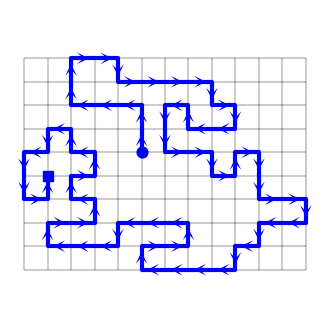

Terminated at step = 72


In [67]:
nsteps = 100
r_vec = single_ignorant_SARW(nsteps)
x_vec = [r[1] for r in r_vec]
y_vec = [r[2] for r in r_vec]
PlotSingleWalk.plot_single_walk(x_vec, y_vec);

## Biased SARW

In [17]:
function biased_one_step(moves::Vector{Float64})
    ndim::Int64 = length(moves) + 1
    rn::Int64 = ceil((ndim-1)*rand())
    return moves[rn]
end;

In [18]:
ndim = 3
moves_all = available_moves(ndim)
moves_avail = moves_all[1:end-1]
println("Available moves: $moves_avail")
biased_one_step(moves_avail)

Available moves: [[1.0, 0.0, 0.0], [-1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, -1.0, 0.0], [0.0, 0.0, 1.0]]


3-element Vector{Float64}:
  0.0
 -1.0
  0.0

In [71]:
function single_biased_SARW(nsteps::Int64=10; ndim::Int64=2)
    """ Generate a single biased self-avoiding random walk in d-dimensions
    nsteps = number of steps of the random walk
    ndim = number of dimensions
    """
    traj = [zeros(Float64, ndim)]
    x = zeros(Float64, ndim)
    lattice = Dict([nsteps+1,nsteps+1]=>true)
    moves_all = available_moves(ndim)
    step = 1
    while true
        moves_avail = filter(m->(m!=x),moves_all)
        Δ = biased_one_step(moves_avail)
        lid = fill(Float64(nsteps)+1.0, ndim)
        lid_new = fill(Float64(nsteps)+1.0, ndim)
        for d ∈ 1:ndim
            lid[d] += x[d]
            lid_new[d] += Δ[d] + x[d]
        end
        trapped = [false for i in 1:2*ndim]
        for d ∈ 1:ndim
            j::Int64 = 2*d
            trapped[j-1] = haskey(lattice, lid.+moves_all[j-1])
            trapped[j] = haskey(lattice, lid.+moves_all[j])
        end
        if step == nsteps
            break
        elseif all(trapped)
            break
        elseif !haskey(lattice, lid_new)
            lattice[lid_new] = true
            x += Δ
            step += 1
            push!(traj, x)
        end
    end
    println("Terminated at step = $step")
    return traj
end;

In [72]:
single_biased_SARW(10,ndim=2)

Terminated at step = 10


10-element Vector{Vector{Float64}}:
 [0.0, 0.0]
 [1.0, 0.0]
 [1.0, -1.0]
 [2.0, -1.0]
 [2.0, 0.0]
 [2.0, 1.0]
 [2.0, 2.0]
 [2.0, 3.0]
 [1.0, 3.0]
 [0.0, 3.0]

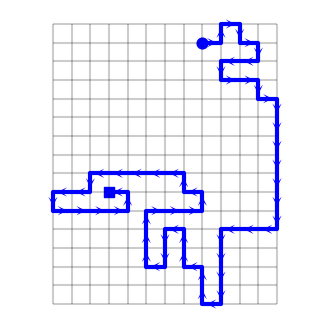

Terminated at step = 62


In [76]:
nsteps = 100
r_vec = single_biased_SARW(nsteps)
x_vec = [r[1] for r in r_vec]
y_vec = [r[2] for r in r_vec]
PlotSingleWalk.plot_single_walk(x_vec, y_vec);